In [1]:
import pandas as pd
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt

In [2]:
def gradient_descent_linear(data_ref: np.ndarray, data_in: np.ndarray, alfa: float, n_epoca: int) -> np.ndarray:
    """
    Aqui utilizamos a estratégia de Batch do gradiente descendente, ou seja, utilizamos todos os exemplos fornecidos como o tamanho de batch, por isso cada época será uma iteração do loop de treinamento.
    Falando um pouco sobre o algoritmo do gradiente descendente, as derivadas são calculadas e armazenadas nas variáveis der_, que para esse caso linear é basicamente a média do erro. Abaixo temos a formula da hipótese para realizar a regressão linear:
    Hipótese:
        data_hip = teta0 + teta1 * data_in
    
    Derivadas:
        der0 = np.sum(hip_x - x)/x.size
        der1 = np.sum((hip.x - x) * y)/x.size

    Parâmetros:
        data_ref(np.ndarray): valores de referência da coordenada da bola
        data_in(np.ndarray): valores de entrada (variável independente da equação)
        alfa(float): taxa de aprendizagem da regressão
        n_epoca(int): número de épocas para aprendizagem
    """
    # inicialização de teta0 e teta1
    teta0 = 0.
    teta1 = 0.
    flag = True
    # iteração de aprendizagem
    for _ in range(n_epoca):
        # calculo dos dados de hipótese
        data_hip = teta0 + teta1 * data_in
        # equações derivadas
        der0 = np.sum((data_hip - data_ref))/data_in.size
        der1 = np.sum((data_hip - data_ref)*data_in)/data_in.size
        # atualização dos coeficientes de acordo com a taxa de aprendizagem
        teta0 = teta0 - alfa* der0
        teta1 = teta1 - alfa* der1
    return np.array([teta0, teta1])

In [3]:
def linear_regression(kick: np.ndarray, alfa: float = 0.1, n_epoca: int = 10000) -> np.ndarray:
    """
    Esse método é responsável por fazer o cálculo dos valores de teta(z) e teta(x) da regressão linear utilizando o gradiente descendente.
    Aqui farei o uso da seguinte hipótese das variáveis x e z (que são duas das coordenadas do centro da bola) em função da variável y (a ultima coordenada da bola):
        hx_teta(t) = tetax0 + tetax1 * y
        hz_teta(t) = tetaz0 + tetaz1 * y

    Parâmetros:
        kick(np.ndarray): dados de referência das coordenadas da bola
        alfa(float): taxa de aprendizagem da regressão
        n_epoca(int): número de épocas para aprendizagem
    """
    # separa as variaveis da coordenada do chute
    x = kick[:,0]
    y = kick[:,1]
    z = kick[:,2]
    # crio um array para armazenar os coeficientes da regressão
    teta = np.ndarray(shape=(2,2),dtype=np.float64)
    # utilizo o Gradiente Descente da regressão linear da hipótese de x.
    teta[0,:] = gradient_descent_linear(data_ref=x,data_in=y,alfa=alfa,n_epoca=n_epoca)
    # utilizo o Gradiente Descenete da regressão linear da hipótese de z.
    teta[1,:] = gradient_descent_linear(data_ref=z,data_in=y,alfa=alfa,n_epoca=n_epoca)
    # calculo da trajetoria do chute seguindo a regressão
    array_y = np.linspace(-1,2.1,1000)
    array_x = func(array_y,teta[0,:],"x")
    array_z = func(array_y,teta[1,:],"z")
    # plot 3D com os dados coletados do chute e a trajetória de previsão
    plot_3d(kick=kick,array_x=array_x,array_y=array_y,array_z=array_z)

    return teta

In [4]:
def gradient_descent_polynomial(data_ref: np.ndarray, data_in: np.ndarray, alfa: float, n_epoca: int, n_var: int) -> np.ndarray:
    """
    Semelhante ao gradiente descente linear, as derivadas são calculadas e armazenadas no array der. Abaixo temos a formula da hipótese para realizar a regressão polinomial:
    Hipótese:
        data_hip = teta0 + teta1 * data_in + teta2 * data_in**2 ... , dependendo do grau de complexidade da equação

    Derivadas:
        der[0] = grau_complexidade * np.sum(hip_x - x)/x.size
        der[1] = grau_complexidade * np.sum((hip.x - x) * y)/x.size
        der[2] = grau_complexidade * np.sum((hip.x - x) * y**2)/x.size
        ...
    
    Parâmetros:
        data_ref(np.ndarray): valores de referência da coordenada da bola
        data_in(np.ndarray): valores de entrada (variável independente da equação)
        alfa(float): taxa de aprendizagem da regressão
        n_epoca(int): número de épocas para aprendizagem
        n_var(int): grau de complexidade da variável
    """
    teta = np.zeros(shape=n_var+1, dtype=np.float128)
    der = np.zeros(shape=n_var+1, dtype=np.float128)
    for _ in range(n_epoca):
        data_hip = np.zeros(shape=data_ref.size)
        for index, t in enumerate(teta):
            data_hip += t * data_in ** (index)
        for index in range(der.size):
            if index == 0:
                der[index] = n_var * np.sum((data_hip-data_ref))/data_in.size
            else:
                der[index] = n_var * np.sum((data_hip-data_ref)*data_in**(index))/data_in.size
        for index in range(der.size):
            teta[index] = teta[index] - alfa * der[index]
    return teta

In [5]:
def polynomial_regression(kick: np.ndarray, n_x: int = 1, n_z: int = 2,  alfa: float = 0.1, n_epoca: int = 10000) -> Tuple:
    """
    Esse método é responsável por fazer o cálculo dos valores de teta(z) e teta(x) da regressão polinomial utilizando também o cálculo do gradiente descendente.
    Aqui farei o uso da seguinte hipótese das variáveis x e z (que são duas das coordenadas do centro da bola) em função da variável y (a ultima coordenada da bola):
        hx_teta(t) = tetax0 + tetax1 * y**1 + tetax2 * y**2... , dependendo do grau de complexidade da equação 
        hz_teta(t) = tetaz0 + tetaz1 * y**1 + tetaz2 * y**2... , dependendo do grau de complexidade da equação

    Parâmetros:
        kick(np.ndarray): dados de referência das coordenadas da bola
        n_x(int): grau de complexidade de x
        n_z(int): grau de complexidade de z
        alfa(float): taxa de aprendizagem da regressão
        n_epoca(int): número de épocas para aprendizagem
    """
    # separa as variaveis da coordenada do chute
    x = kick[:,0]
    y = kick[:,1]
    z = kick[:,2]
    # array com os valores dos coeficientes da regressão de x
    tetax = gradient_descent_polynomial(data_ref=x,data_in=y,alfa=alfa,n_epoca=n_epoca,n_var=n_x)
    # array com os valores dos coeficientes da regressão de z
    tetaz = gradient_descent_polynomial(data_ref=z,data_in=y,alfa=alfa,n_epoca=n_epoca,n_var=n_z)
    # calculo da trajetoria do chute seguindo os valores de teta encontrados na regressão
    array_y = np.linspace(-1,2.1000)
    array_x = func(array_y,tetax,"x")
    array_z = func(array_y,tetaz,"z")
    
    # plot 3D com os dados coletados do chute e a trajetória de previsão
    plot_3d(kick=kick,array_x=array_x,array_y=array_y,array_z=array_z)

    return tetax, tetaz

In [6]:
def plot_3d(kick: np.ndarray, array_x: np.ndarray, array_y: np.ndarray, array_z: np.ndarray):
    """
    Realiza o plot do gráfico 3D dos pontos da bola e a trajetória prevista para ela de acordo com a regressão, podendo ser linear ou polinomial.

    Parâmetros:
        kick(np.ndarray): dados da coordenada da bola capturados
        array_x(np.ndarray): dados da coordenada x da trajetória
        array_y(np.ndarray): dados da coordenada y da trajetória
        array_z(np.ndarray): dados da coordenada z da trajetória
    """
    # array para fazer o plot do campo de futebol
    X, Y =  np.meshgrid(np.linspace(-3,3,2), np.linspace(0,2.1,2))
    Z =  np.zeros(X.shape)

    fig = plt.figure(figsize=plt.figaspect(0.3))
    # adiciona um sub plot de um angulo do chute
    ax = fig.add_subplot(1,3,1,projection='3d')
    # plot do gol na imagem
    ax.plot([-3, -3, 3, 3], [0, 0.3, 0.3, 0], zdir='y', zs=0, c='b')
    # plot do campo na imagem
    ax.plot_surface(X, Y, Z, shade=False, color='g', alpha=.4)
    # definição dos limites do gráfico
    ax.set_xlim3d(-3,3)
    ax.set_ylim3d(0,2.1)
    ax.set_zlim3d(0,0.3)
    # nomeia as eixos para referência
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    # plot dos pontos de referência do chute
    ax.scatter3D(kick[:,0],kick[:,1],kick[:,2],c='b')
    # plot da previsão do chute
    ax.plot(array_x,array_y,array_z,c='r')
    # angulo do plot 3D
    ax.view_init(30, 10)

    # adiciona um sub plot de outro angulo do chute
    ax = fig.add_subplot(1,3,2,projection='3d')
    # plot do gol na imagem
    ax.plot([-3, -3, 3, 3], [0, 0.3, 0.3, 0], zdir='y', zs=0, c='b')
    # plot do campo na imagem
    ax.plot_surface(X, Y, Z, shade=False, color='g', alpha=.4)
    # definição dos limites do gráfico
    ax.set_xlim3d(-3,3)
    ax.set_ylim3d(0,2.1)
    ax.set_zlim3d(0,0.3)
    # nomeia as eixos para referência
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    # plot dos pontos de referência do chute
    ax.scatter3D(kick[:,0],kick[:,1],kick[:,2],c='b')
    # plot da previsão do chute
    ax.plot(array_x,array_y,array_z,c='r')
    # angulo do plot 3D
    ax.view_init(30, 75)

    # adiciona um sub plot de outro angulo do chute
    ax = fig.add_subplot(1,3,3,projection='3d')
    # plot do gol na imagem
    ax.plot([-3, -3, 3, 3], [0, 0.3, 0.3, 0], zdir='y', zs=0, c='b')
    # plot do campo na imagem
    ax.plot_surface(X, Y, Z, shade=False, color='g', alpha=.4)
    # definição dos limites do gráfico
    ax.set_xlim3d(-3,3)
    ax.set_ylim3d(0,2.1)
    ax.set_zlim3d(0,0.3)
    # nomeia as eixos para referência
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    # plot dos pontos de referência do chute
    ax.scatter3D(kick[:,0],kick[:,1],kick[:,2],c='b')
    # plot da previsão do chute
    ax.plot(array_x,array_y,array_z,c='r')
    # angulo do plot 3D
    ax.view_init(30, 90)

In [7]:
def func(data_in: np.ndarray, teta: np.ndarray, str: str) -> np.ndarray:
    """
    Aplica a equação encontrada na regressão, gerando a coordenada em um eixo da trajetória.

    Parâmteros:
        data_in(np.ndarray): array com a variável independente da equação
        teta(np.ndarray): array com os coefientes da equação encontrados na regressão
        str(str): string com qual a variável sendo calculada
    """
    # array de resposta
    res = np.zeros(shape=data_in.size)
    # string que apresenta a equação da função
    string = f"{str} = "
    # loop para formular a equação e incrementar a coordenada
    for i in range(teta.size):
        if i == 0:
            string += f"{teta[i]:.2f} + "
        elif i == teta.size -1:
            string += f"{teta[i]:.2f}*y^{i}"
        else:
            string += f"{teta[i]:.2f}*y^{i} + "
        res += teta[i] * data_in**(i)
    print(string)
    return res

x = -2.29 + 0.99*y^1
z = 0.10 + 0.01*y^1


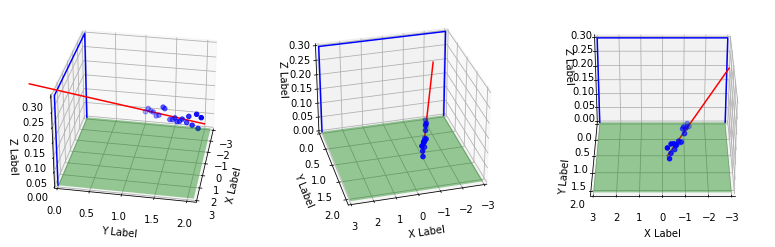

In [8]:
kick1 = np.loadtxt("kick1.dat")
a1 = linear_regression(kick=kick1,alfa=0.1,n_epoca=10000)

x = -2.29 + 0.99*y^1
z = 0.10 + 0.01*y^1


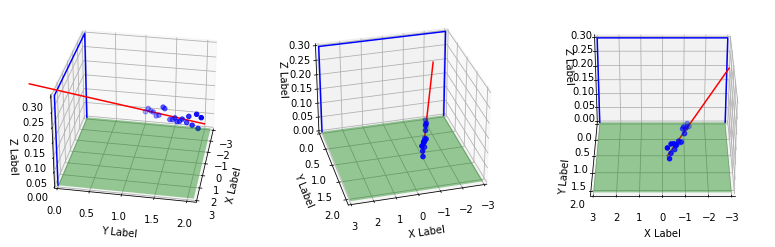

In [9]:
a2 = linear_regression(kick=kick1,alfa=0.02,n_epoca=100000)

x = -1.14 + 0.49*y^1
z = 0.47 + -0.15*y^1


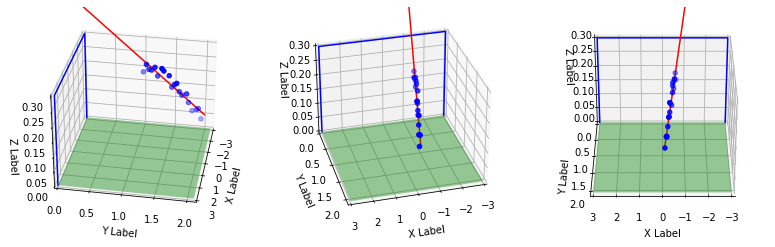

In [10]:
kick2 = np.loadtxt("kick2.dat")
a3 = linear_regression(kick=kick2,alfa=0.01,n_epoca=100000)

x = -1.13 + 0.49*y^1
z = 0.22 + 0.18*y^1 + -0.11*y^2


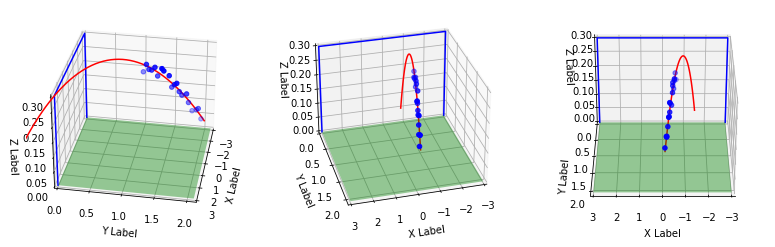

In [11]:
a4 = polynomial_regression(kick=kick2,alfa=0.002,n_epoca=100000)

x = -1.04 + 0.43*y^1
z = 0.18 + 0.12*y^1 + 0.03*y^2 + -0.05*y^3


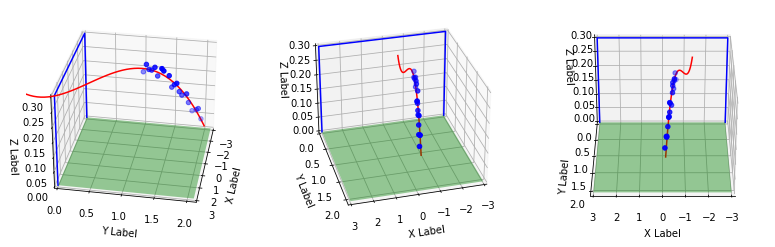

In [14]:
a6 = polynomial_regression(kick=kick2,n_x=1, n_z=3,alfa=0.001,n_epoca=100000)

x = -0.54 + -0.28*y^1 + 0.24*y^2
z = 0.18 + 0.12*y^1 + 0.03*y^2 + -0.05*y^3


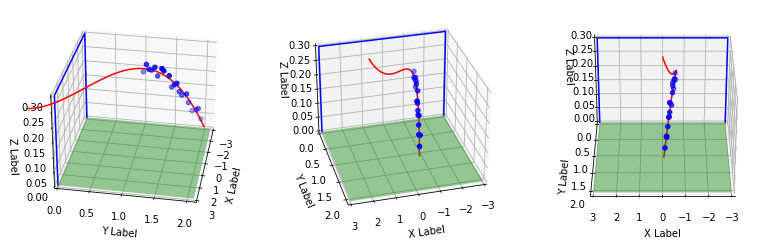

In [15]:
a7 = polynomial_regression(kick=kick2,n_x=2, n_z=3,alfa=0.001,n_epoca=100000)